In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing

df = pd.read_csv("walmart_sales.csv")
print(df.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

df['Sales'] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)

monthly_sales = df.groupby(pd.Grouper(key='Date', freq='ME'))['Sales'].sum().reset_index()
print(monthly_sales)

         Date       Sales
0  2010-02-28        0.00
1  2010-03-31        0.00
2  2010-04-30        0.00
3  2010-05-31        0.00
4  2010-06-30        0.00
5  2010-07-31        0.00
6  2010-08-31        0.00
7  2010-09-30        0.00
8  2010-10-31        0.00
9  2010-11-30        0.00
10 2010-12-31        0.00
11 2011-01-31        0.00
12 2011-02-28        0.00
13 2011-03-31        0.00
14 2011-04-30        0.00
15 2011-05-31        0.00
16 2011-06-30        0.00
17 2011-07-31        0.00
18 2011-08-31        0.00
19 2011-09-30        0.00
20 2011-10-31        0.00
21 2011-11-30  4383775.32
22 2011-12-31  4696163.78
23 2012-01-31  2863078.87
24 2012-02-29  7067583.76
25 2012-03-31  3451599.19
26 2012-04-30  2079354.62
27 2012-05-31  2427746.60
28 2012-06-30  2829122.35
29 2012-07-31  2438237.56
30 2012-08-31  4322058.65
31 2012-09-30  2368699.46
32 2012-10-31  1405573.08
33 2012-11-30  7174711.30
34 2012-12-31  3032492.83
35 2013-01-31  3071387.11
36 2013-02-28  7329510.32
37 2013-03-3

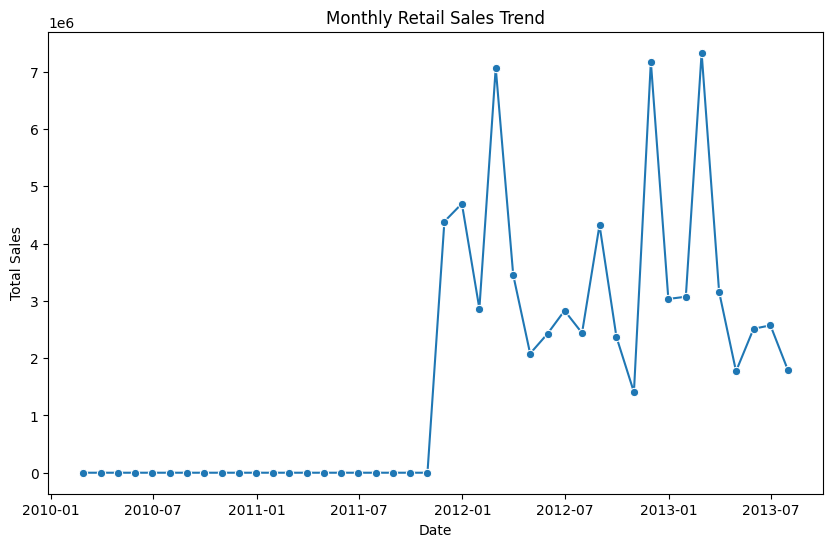

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o')
plt.title("Monthly Retail Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

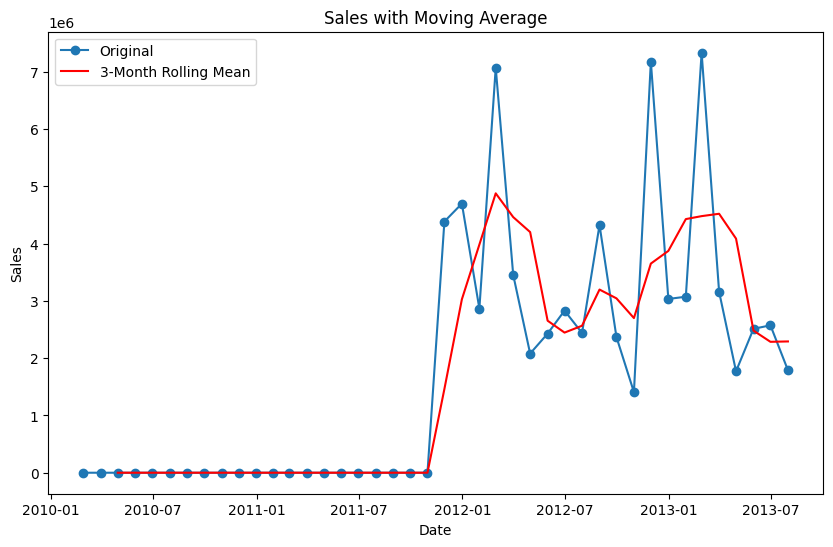

In [11]:
monthly_sales['Rolling_Mean'] = monthly_sales['Sales'].rolling(window=3).mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], label='Original', marker='o')
plt.plot(monthly_sales['Date'], monthly_sales['Rolling_Mean'], label='3-Month Rolling Mean', color='red')
plt.title("Sales with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

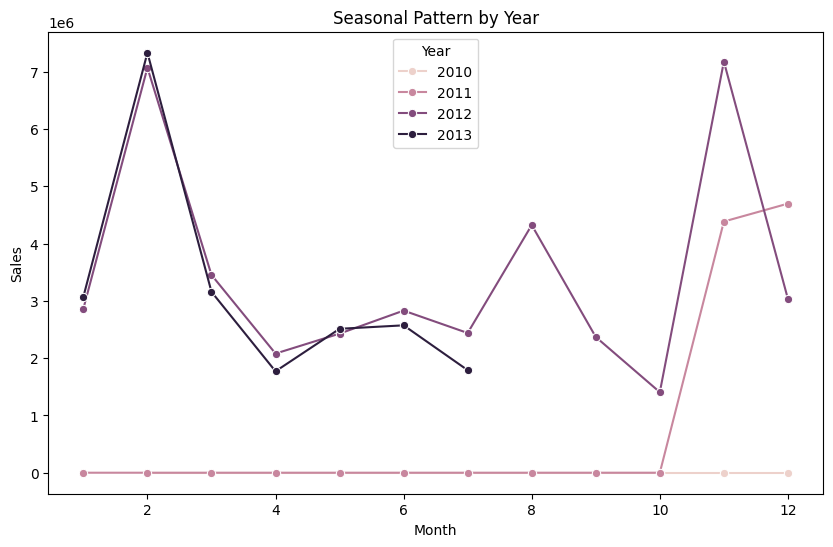

In [12]:
# of year
monthly_sales['Month'] = monthly_sales['Date'].dt.month
monthly_sales['Year'] = monthly_sales['Date'].dt.year

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title("Seasonal Pattern by Year")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

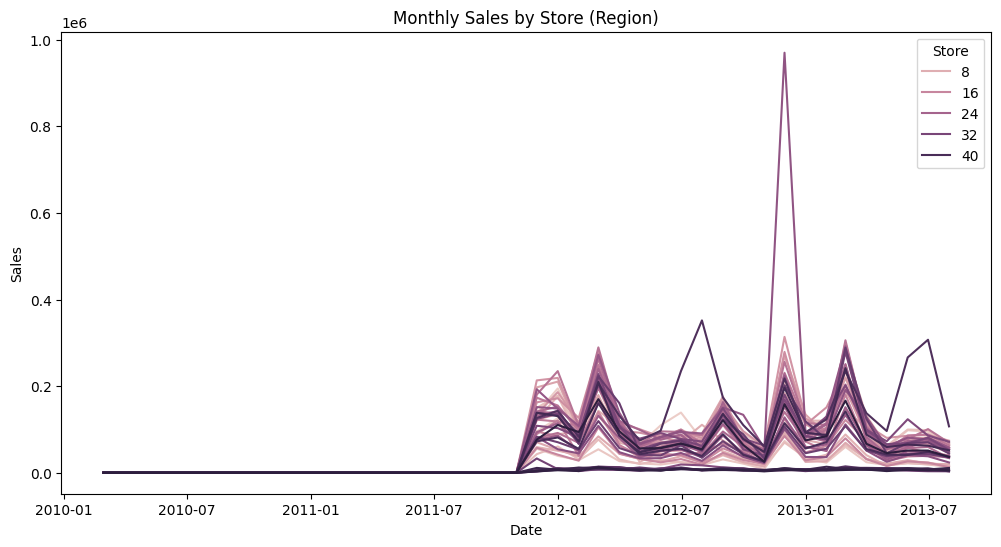

In [13]:
# Sales of store
region_sales = df.groupby(['Store', pd.Grouper(key='Date', freq='ME')])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=region_sales, x='Date', y='Sales', hue='Store')
plt.title("Monthly Sales by Store (Region)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

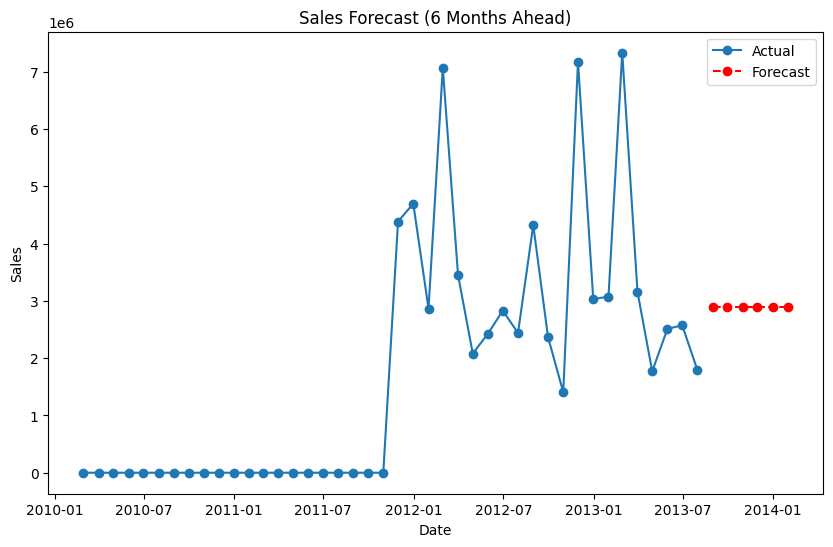

In [14]:
# Forecast
model = SimpleExpSmoothing(monthly_sales['Sales']).fit(smoothing_level=0.2, optimized=False)
forecast_values = model.forecast(steps=6)
forecast_dates = pd.date_range(start=monthly_sales['Date'].iloc[-1] + pd.DateOffset(months=1),
                               periods=6, freq='ME')

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], label='Actual', marker='o')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red', linestyle='--', marker='o')
plt.title("Sales Forecast (6 Months Ahead)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

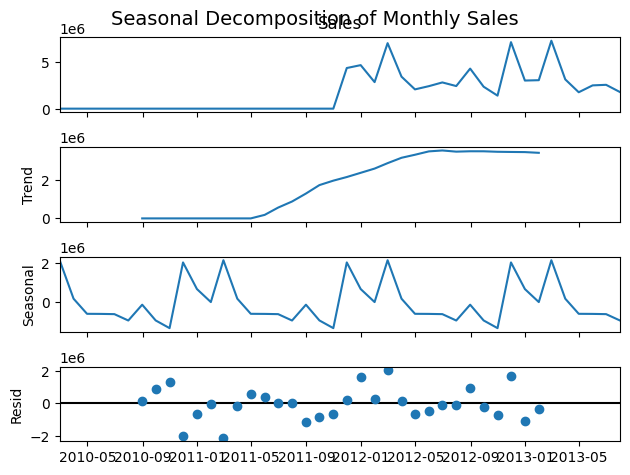

In [15]:
ts = monthly_sales.set_index('Date')['Sales'].asfreq('ME')

result = seasonal_decompose(ts, model='additive', period=12)
result.plot()
plt.suptitle("Seasonal Decomposition of Monthly Sales", fontsize=14)
plt.show()